
# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
 


### Question(s) for Analysis
1- Does personal factors like Age,Neighbourhood, Gender and Scholarships affects the show?

2- Does the health condition of the patient affects the show?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [12]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking the number of columns and rows in the dataset 
df.shape

(110527, 14)

In [4]:
#check number of null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#check number of duplicated values
df.duplicated().sum()

0

In [6]:
# get the statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#check missing values and data types of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#check the unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#getting the index of the -1 value age 
negative_age = df.query('Age == -1')
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
#removing the age whose value is -1
df.drop(index=99832 , inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
#removing unnecessary data 
df.drop(['PatientId' , 'AppointmentID' , 'AppointmentDay' , 'ScheduledDay' ], axis = 1 , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#renaming columns

df.rename(columns = {'No-show':'No_show' , 'Handcap': 'Handicap'} , inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



### Personal Charcteristics

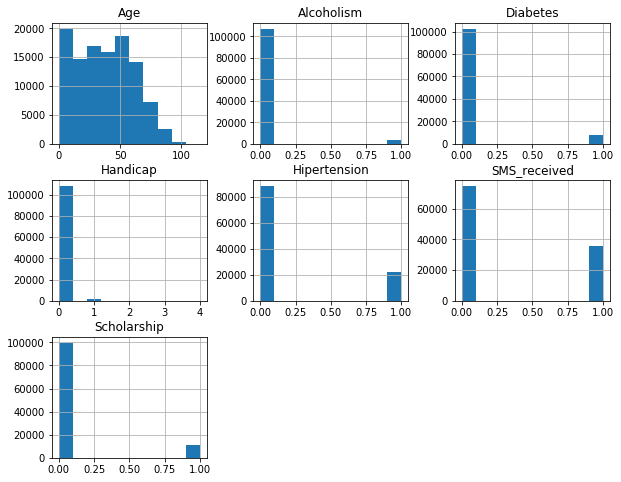

In [13]:
# general look at hist of the data 
df.hist(figsize=(10,8));

In [14]:
#create masks for the showed and not showed pacients
show = df.No_show == 'No'
no_show = df.No_show == 'Yes'
df[show].count() , df[no_show].count()

(Gender           88207
 Age              88207
 Neighbourhood    88207
 Scholarship      88207
 Hipertension     88207
 Diabetes         88207
 Alcoholism       88207
 Handicap         88207
 SMS_received     88207
 No_show          88207
 dtype: int64, Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hipertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handicap         22319
 SMS_received     22319
 No_show          22319
 dtype: int64)

About 20% of patients didn't show

In [15]:
#average age of the patients who attended
df.Age[show].mean()

37.790504154999034

In [16]:
#average age of the patients who didn't attend
df.Age[no_show].mean()

34.317666562121957

In [22]:
#relation between age and showing
def age_visual(df, column , show , no_show ):
    df[column][show].hist(alpha=0.5 , bins = 20 , label = 'showed')
    df[column][no_show].hist(alpha=0.5 , bins = 20 , label = 'not showed')
    plt.legend();

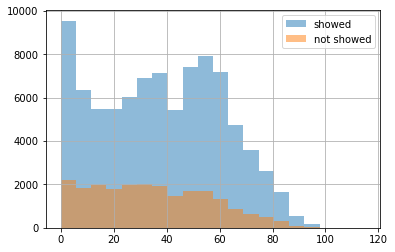

In [23]:
#calling the age_visual method
age_visual(df , 'Age' , show , no_show)

Patients who are from 0 to 10 years old are the most shows.
Patients who are from 50 to 55 years old are the second most shows.
Patients who are from 65 to 95 or 15 years old have the least shows.

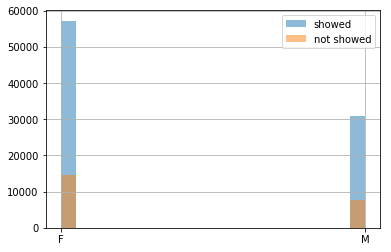

In [25]:
#relationship between gender and no-show
df.Gender[show].hist(alpha=0.5 , bins=20 , label = 'showed')
df.Gender[no_show].hist(alpha=0.5 , bins=20 , label = 'not showed')
plt.legend();

In [19]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [20]:
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

almost 20% of males and females didn't show, so Gender is not affecting factor.

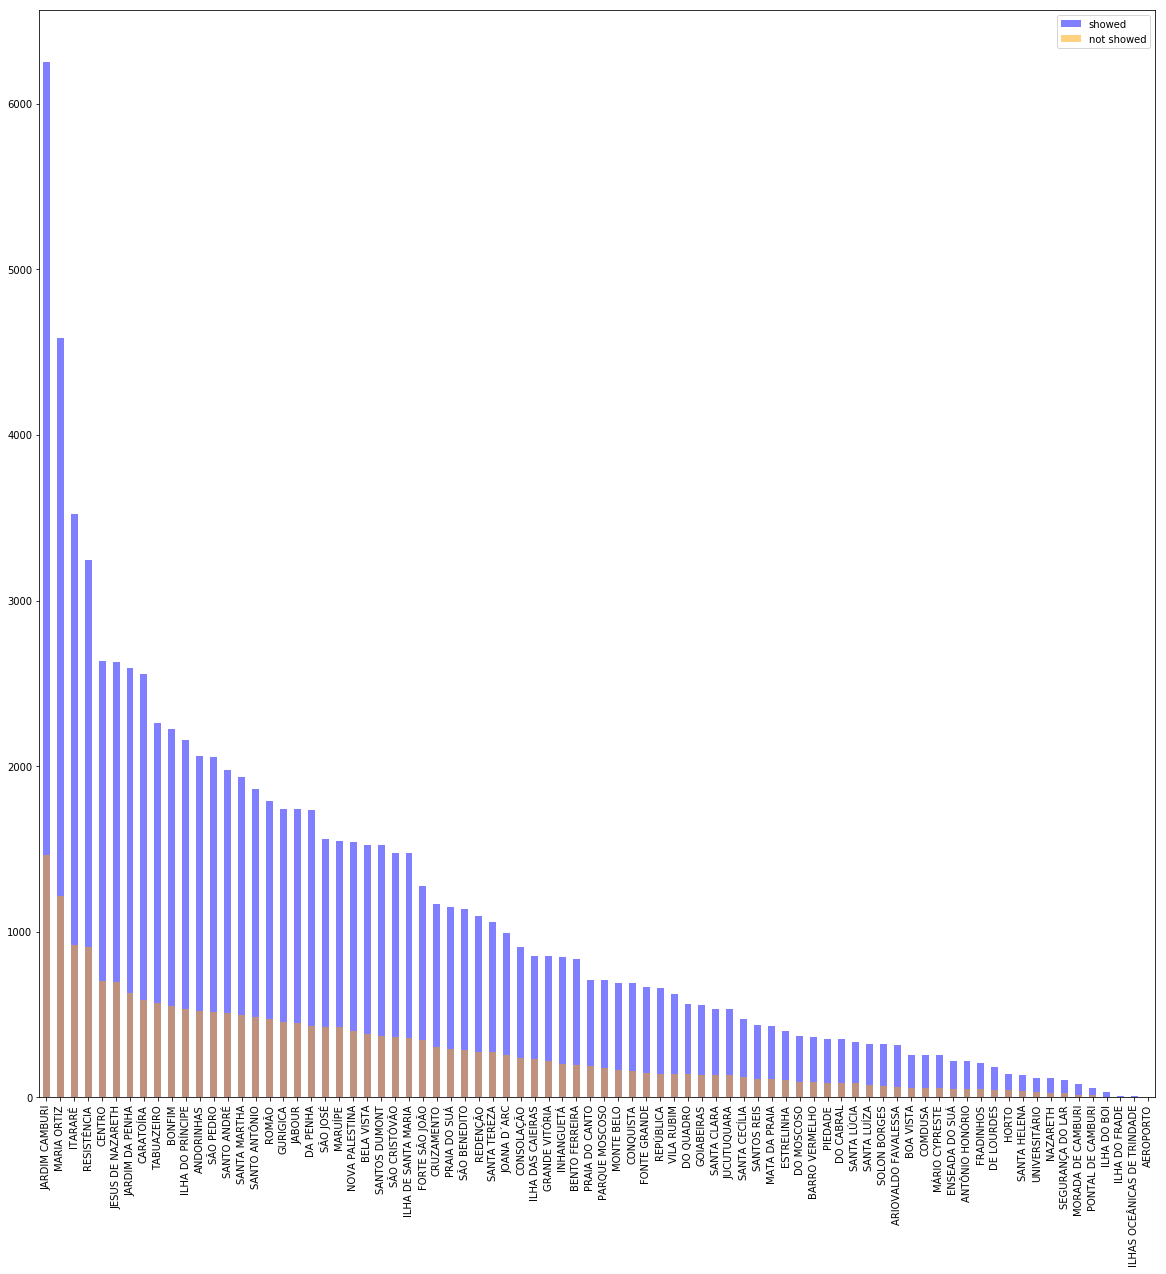

In [21]:
#relationship between the neighbourhood and no-show
df.Neighbourhood[show].value_counts().plot(alpha=0.5 , kind='bar' ,color='blue', label = 'showed',figsize=(20,20))
df.Neighbourhood[no_show].value_counts().plot(alpha=0.5 , kind='bar' ,color='orange', label = 'not showed',figsize=(20,20))
plt.legend();

Neighbouhood affects the no-show. I can see some areas have a huge numbers of patients and some areas have less number.

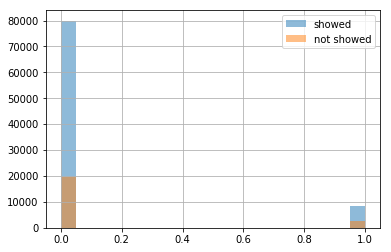

In [22]:
#relationship between the scholarhip and no-show
df.Scholarship[show].hist(alpha=0.5 , bins=20 , label = 'showed')
df.Scholarship[no_show].hist(alpha=0.5 , bins=20 , label = 'not showed')
plt.legend();

In [27]:
df.groupby('Scholarship')['No_show'].value_counts()

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

almost the same ratio for the patients who have a scholarship and who don't have.

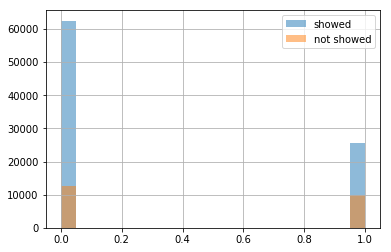

In [23]:
##relationship between the SMS received and no-show
df.SMS_received[show].hist(alpha=0.5 , bins=20 , label = 'showed')
df.SMS_received[no_show].hist(alpha=0.5 , bins=20 , label = 'not showed')
plt.legend();

The number of people who didn't receive SMS and attended is bigger than who received and attend so SMS isn't important factor.

### Health Charcteristics

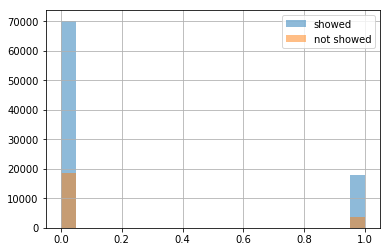

In [24]:
#relationship between Hipertension and no-show
df.Hipertension[show].hist(alpha=0.5 , bins=20 , label = 'showed')
df.Hipertension[no_show].hist(alpha=0.5 , bins=20 , label = 'not showed')
plt.legend();

Not many Patients suffer from hipertension.
There is no strong relationship between hipertension and no-show.

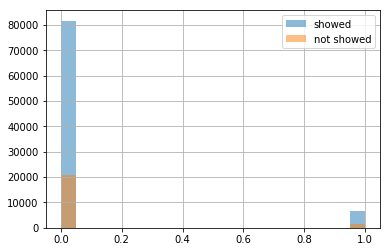

In [25]:
#relationship between Diabetes and no-show
df.Diabetes[show].hist(alpha=0.5 , bins=20 , label = 'showed')
df.Diabetes[no_show].hist(alpha=0.5 , bins=20 , label = 'not showed')
plt.legend();

Not many Patients suffer from diabetes.
There is no strong relationship between diabetes and no-show.

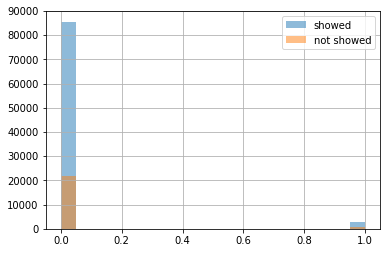

In [26]:
#relationship between Alcoholism and no-show
df.Alcoholism[show].hist(alpha=0.5 , bins=20 , label = 'showed')
df.Alcoholism[no_show].hist(alpha=0.5 , bins=20 , label = 'not showed')
plt.legend();

Only few patients are Alcoholism 
also there is no strong relationship between Alcoholism and no-show.

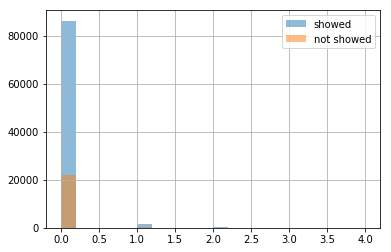

In [29]:
#relationship between Handicap and no-show
df.Handicap[show].hist(alpha=0.5 , bins=20 , label = 'showed')
df.Handicap[no_show].hist(alpha=0.5 , bins=20 , label = 'not showed')
plt.legend();

In [30]:
df.groupby('Handicap')['No_show'].value_counts()

Handicap  No_show
0         No         86373
          Yes        21912
1         No          1676
          Yes          366
2         No           146
          Yes           37
3         No            10
          Yes            3
4         No             2
          Yes            1
Name: No_show, dtype: int64

Patients with hanicaps almost have same showing rate with the patients without handicaps.

<a id='conclusions'></a>
## Conclusions

1- Age affects the rate of show as patients who are from 0 to 10 years old are the most shows, patients who are from 50 to 55 years old are the second most shows , patients who are from 65 to 95 or 15 years old have the least shows. 

2- Patients from JARDIM DA PENHA have the most showing rate, this means neighbourhood affects the showing rate. 

3- SMS was not affecting factor as patients who didn't receive SMS did more show more than the patients who received.


### Limitations
no relationship between showing and Age, Gender and diseases.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0